In [7]:
import glob

def ouvrir_fichier(path, lines = False):
    f = open(path, encoding="utf-8")
    if lines == True:
        out = f.readlines()
    else:
        out = f.read()
    f.close()
    return out
from scipy import spatial
from sklearn.feature_extraction.text import CountVectorizer

def check_distances(source, cibles, mini=1, maxi = 2):
  V = CountVectorizer(analyzer="char", ngram_range=(mini, maxi))
  X = V.fit_transform([source]+cibles).toarray()
  distances = [spatial.distance.braycurtis(X[0], x) for x in X[1:]]
  return distances

In [3]:
liste_fic = glob.glob("data_Aimard/Aimard*.txt")
liste_align = [ouvrir_fichier(x, lines = True) for x in liste_fic ]

In [24]:
import time

start = time.time()

texte_source = liste_align[0][:100]
texte_cible  = liste_align[1][:100]
matrix = []
for i in range(len(texte_source)):
    #for j in range(len(texte_cible)):##PLus rapide de comparer une ligne à tout l'autre texte semble-t-il
        distances = check_distances(texte_source[i], texte_cible)
        #matrix.append([1-x for x in distances])
        matrix.append(distances)
end = time.time()
print(end - start)


1.0629775524139404


In [25]:
import pandas as pd
df = pd.DataFrame(matrix)
#print(df)

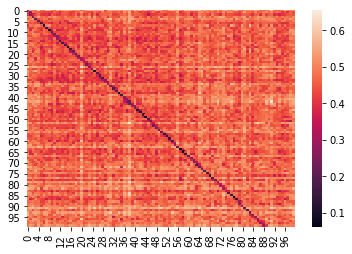

In [26]:
import numpy as np
import seaborn as sns
ax = sns.heatmap(matrix)

In [33]:

from munkres import Munkres
munk = Munkres()

res_hongrois = munk.compute(matrix)
print(res_hongrois)

[(0, 0), (1, 97), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 8), (10, 9), (11, 10), (12, 74), (13, 11), (14, 12), (15, 13), (16, 14), (17, 15), (18, 16), (19, 17), (20, 18), (21, 19), (22, 20), (23, 21), (24, 93), (25, 22), (26, 23), (27, 24), (28, 25), (29, 26), (30, 27), (31, 28), (32, 29), (33, 96), (34, 30), (35, 31), (36, 32), (37, 33), (38, 34), (39, 35), (40, 36), (41, 37), (42, 38), (43, 95), (44, 39), (45, 40), (46, 41), (47, 42), (48, 43), (49, 44), (50, 45), (51, 46), (52, 89), (53, 47), (54, 48), (55, 49), (56, 50), (57, 51), (58, 52), (59, 53), (60, 54), (61, 99), (62, 55), (63, 56), (64, 57), (65, 58), (66, 59), (67, 60), (68, 61), (69, 62), (70, 91), (71, 63), (72, 64), (73, 65), (74, 66), (75, 67), (76, 68), (77, 69), (78, 70), (79, 71), (80, 72), (81, 92), (82, 73), (83, 94), (84, 75), (85, 76), (86, 77), (87, 78), (88, 79), (89, 90), (90, 80), (91, 81), (92, 82), (93, 83), (94, 84), (95, 85), (96, 86), (97, 98), (98, 87), (99, 88)]


In [38]:
import re
ocr_aligne = []

decalage = 0
new_cible = []
print(len(texte_source))
print(len(texte_cible))

for cpt, paire in enumerate(res_hongrois):
    if paire[0]==paire[1]+decalage:##Indice possible: capitales, phrases...
        #print(f"{paire} alignée")
        #this_line = texte_source[cpt]
        new_cible.append(texte_cible[cpt+decalage])
        #if this_line[0].upper()==this_line[0]:
        #    print(this_line[:10])
        pass
    else:
        next_paire = res_hongrois[cpt+1]
        if next_paire[0]==next_paire[1]+decalage+1:
            print(f"{next_paire} décalée")
            new_cible.append(texte_cible[cpt+decalage]+"---"+texte_cible[cpt+decalage+1])
            decalage+=1
###Repasser une deuxièle fois le Munkres pour vérifier l'alignement   

100
100
(2, 1) décalée
(13, 11) décalée
(25, 22) décalée
(34, 30) décalée
(44, 39) décalée
(53, 47) décalée
(62, 55) décalée
(71, 63) décalée
(82, 73) décalée
(90, 80) décalée


IndexError: list index out of range